## Analysis of local base-pairs parameters

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/base_pairs_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial
    * ``L-BP_cdna.dat`` (``do_x3dna`` output from the trajectory, which contains the DNA bound with the protein)
    * ``L-BP_odna.dat`` (``do_x3dna`` output from the trajectory, which only contains the free DNA)
    
    These two file **should be** present inside tutorial_data of the current/present working directory.
    
    
* The Python APIs **should be** only used when ``do_x3dna`` is executed with ``-ref`` option.


* Detailed documentation is provided [here](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html).

### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna output files.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dnaMD


%matplotlib inline


### Initializing DNA object and storing data to it

* [DNA object](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA) is initialized by using the total number of base-pairs


* Six base-pair parameters (**shear**, **stretch**, **stagger**, **buckle**, **propeller** and **opening**) can be read and stored in DNA object from the input file using function [set_base_pair_parameters(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.set_base_pair_parameters).


* To speed up processing and analysis, data can be stored in a HDF5 file by including HDF5 file name as a argument during initialization. Same file can be used to store and retrieve all other parameters.

In [2]:
# Initialization
pdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs DNA bound with the protein
fdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs free DNA

## If HDF5 file is used to store/save data use these:
# pdna = dnaMD.DNA(60, filename='cdna.h5')     #Initialization for 60 base-pairs DNA bound with the protein
# fdna = dnaMD.DNA(60, filename='odna.h5')     #Initialization for 60 base-pairs free DNA

# Loading data from input files in respective DNA object
# "bp=[1, 60]" will load local base-pair parameters of 1 to 60 base-pairs
# It will load all six parameters (shear, stretch, stagger, buckle, propeller and opening)
parameters=['shear', 'stretch', 'stagger', 'buckle', 'propeller', 'opening']
pdna.set_base_pair_parameters('tutorial_data/L-BP_cdna.dat', bp=[1, 60], parameters=parameters, bp_range=True)
fdna.set_base_pair_parameters('tutorial_data/L-BP_odna.dat', bp=[1, 60], parameters=parameters, bp_range=True)


Reading file : tutorial_data/L-BP_cdna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001

Reading file : tutorial_data/L-BP_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001


### Local base-pair parameter of a base-pair directly from dictionary

* The ``DNA.data`` is a python dictionary which contains all the data. For a base-pair, parameter as a function of time can be directly extracted.


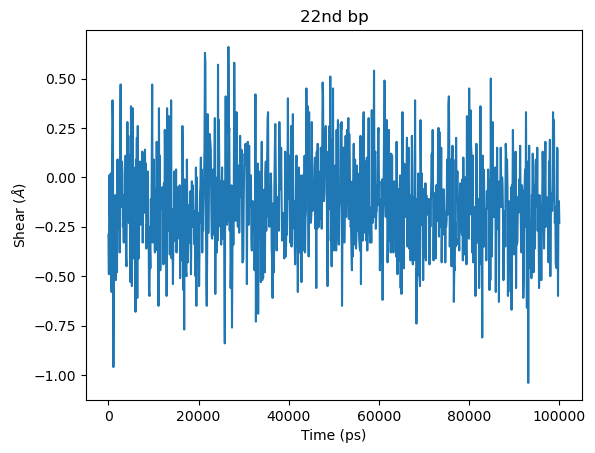

In [3]:
# Extracting "Shear" of 22nd bp
shear_20bp = pdna.data['bp']['22']['shear']

#Shear vs Time for 22nd bp
plt.title('22nd bp')
plt.plot(pdna.time, shear_20bp)
plt.xlabel('Time (ps)')
plt.ylabel('Shear ($\AA$)')
plt.show()


### Local base-pair parameters as a function of time (manually)

* A specific local base-pair parameters for the given base-pairs range can be extracted from the DNA obejct using function [dnaMD.DNA.get_parameters(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.get_parameters).


* The extracted parameters of the given base-pair can be plotted as a function of time


* The extracted parameters (average) for the DNA segment can be plotted as a function of time


Following example shows **Shear** vs **Time** plots. These example also shows that how to extract the parameters value from the DNA object. Other properties could be extracted and plotted using similar steps.  

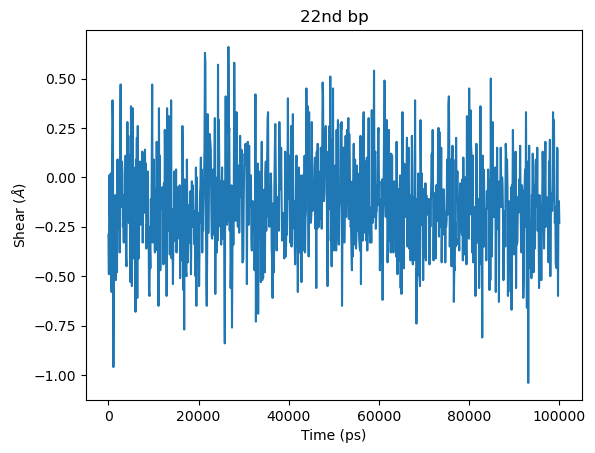

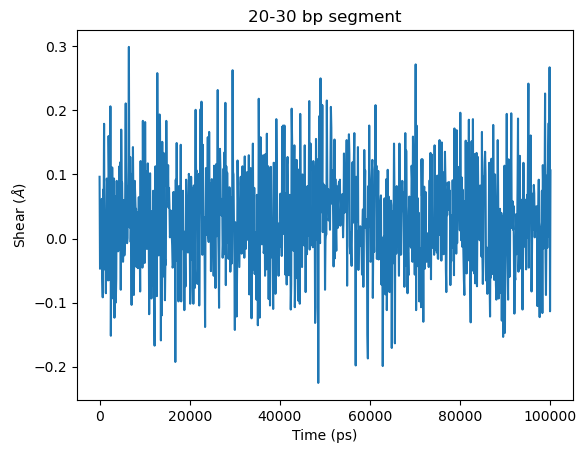

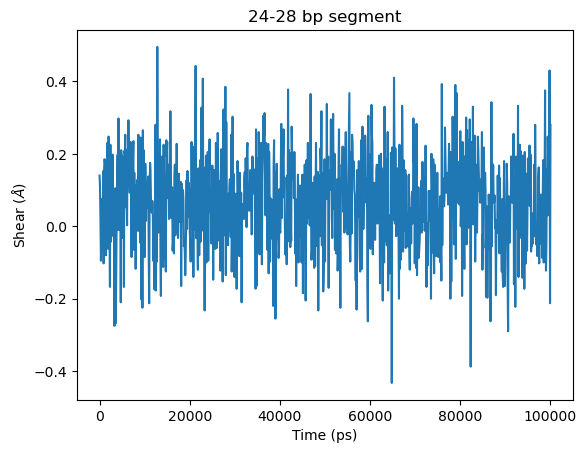

In [4]:
# Extracting "Shear" of 20 to 30 bp
shear_20to30, bp_nums = pdna.get_parameters('shear',[20,30], bp_range=True)

# Shear vs Time for 22nd bp
plt.title('22nd bp')
plt.plot(pdna.time, shear_20to30[2])      # index is 2 for 22nd bp: (20 + 2)
plt.xlabel('Time (ps)')
plt.ylabel('Shear ($\AA$)')
plt.show()

# Average Shear vs Time for segment 20-30 bp
avg_shear_20to30 = np.mean(shear_20to30, axis=0)     # Calculation of mean using mean function of numpy
plt.title('20-30 bp segment')
plt.plot(pdna.time, avg_shear_20to30)
plt.xlabel('Time (ps)')
plt.ylabel('Shear ($\AA$)')
plt.show()

# Average Shear vs Time for segment 24-28 bp
avg_shear_24to28 = np.mean(shear_20to30[4:8], axis=0)     # index of 24th bp is 4 (20 + 4). index of 28th bp is 8 (20 + 8)
plt.title('24-28 bp segment')
plt.plot(pdna.time, avg_shear_24to28)
plt.xlabel('Time (ps)')
plt.ylabel('Shear ($\AA$)')
plt.show()

### Local base-pair parameters as a function of time (using provided functions)

Above examples show the step to extract the values from the DNA object. However, [dnaMD.DNA.time_vs_parameter(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.time_vs_parameter) function could be use to get parameter values as a function of time for the given base-pairs/step or segment


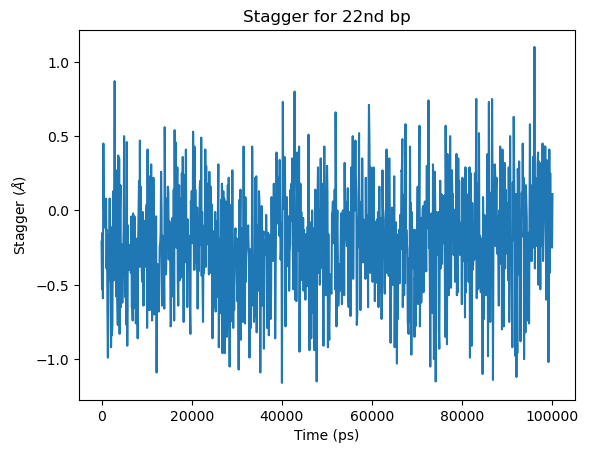

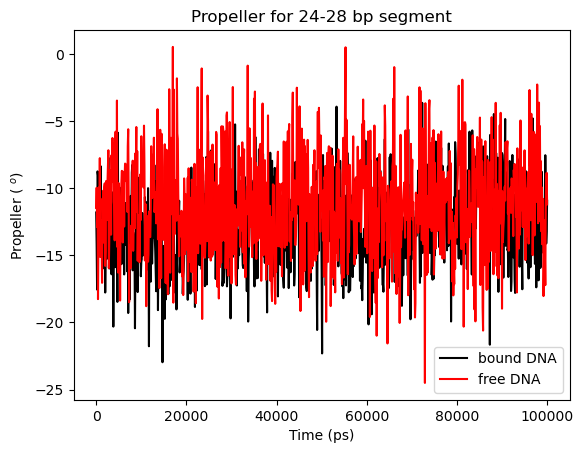

In [5]:
# Stagger vs Time for 22nd bp
plt.title('Stagger for 22nd bp')
time, value = pdna.time_vs_parameter('stagger', [22])
plt.plot(time, value)
plt.xlabel('Time (ps)')
plt.ylabel('Stagger ($\AA$)')
plt.show()

# Propeller vs Time for 30-35 bp segment
plt.title('Propeller for 24-28 bp segment')
# Bound DNA
time, value = pdna.time_vs_parameter('propeller', [30, 35], merge=True, merge_method='mean')
plt.plot(time, value, label='bound DNA', c='k')     # balck color => bound DNA
# Free DNA
time, value = fdna.time_vs_parameter('propeller', [30, 35], merge=True, merge_method='mean')
plt.plot(time, value, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Time (ps)')
plt.ylabel('Propeller ( $^o$)')
plt.legend()
plt.show()

### Distribution of local base-pairs parameters during MD simulations

* As shown in above plot of time vs propeller, comparison between bound and free DNA is very difficult. Therefore, to compare the parameters of either different DNAs or same DNAs in different environment or different segment of same DNAs, the distribution of parameters over the MD trajectory are sometime useful.


* The distribution could be calculated using the function [dnaMD.DNA.parameter_distribution(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.parameter_distribution) as shown in the following examples.


* The normalized distribution is calculated using [numpy.histogram(...)](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html).


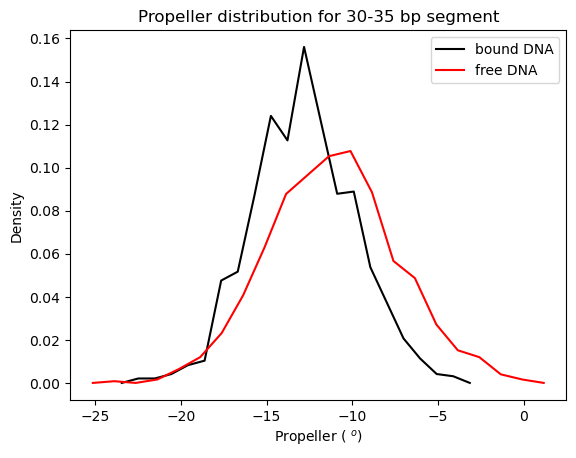

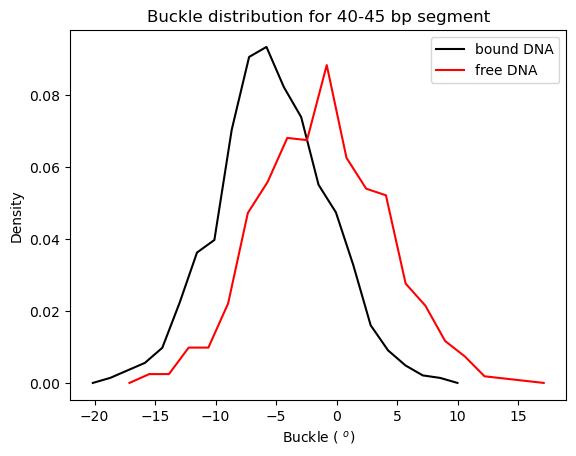

In [6]:
#### Propeller distribution for 30-35 bp segment
plt.title('Propeller distribution for 30-35 bp segment')

### Bound DNA ###

## calculation of parameter distribution for the segment
values, density = pdna.parameter_distribution('propeller', [30, 35], bins=20, merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='bound DNA', c='k')     # balck color => bound DNA

### Free DNA ###

## calculation of parameter distribution for the segment
values, density = fdna.parameter_distribution('propeller', [30, 35], bins=20, merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Propeller ( $^o$)')
plt.ylabel('Density')
plt.legend()
plt.show()


#### Buckle distribution for 40-45 bp segment
plt.title('Buckle distribution for 40-45 bp segment')

### Bound DNA ###

## calculation of parameter distribution for the segment
values, density = pdna.parameter_distribution('buckle', [40, 45], bins=20, merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='bound DNA', c='k')     # balck color => bound DNA

### Free DNA ###

## calculation of parameter distribution for the segment
values, density = fdna.parameter_distribution('buckle', [40, 45], bins=20, merge=True, merge_method='mean')

## plot distribution
plt.plot(values, density, label='free DNA', c='r')    # red color => free DNA

plt.xlabel('Buckle ( $^o$)')
plt.ylabel('Density')
plt.legend()
plt.show()

### Local base-pair parameters as a function of base-pairs

* What is the average values of a given parameter for either each base-pair or a DNA segment?


* To address this question, average values of a given parameter with its error could be calculated for either each base-pair or a DNA segment using a function [dnaMD.DNA.get_mean_error(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.get_mean_error).


* This average values could be also use to compare two DNA.


* Standard error could be calculated using block averaging method as derived in this [publication](http://scitation.aip.org/content/aip/journal/jcp/116/1/10.1063/1.1421362). To use this method, [gmx analyze](http://manual.gromacs.org/programs/gmx-analyze.html) of GROMACS package should be present in ``$PATH`` environment variable.


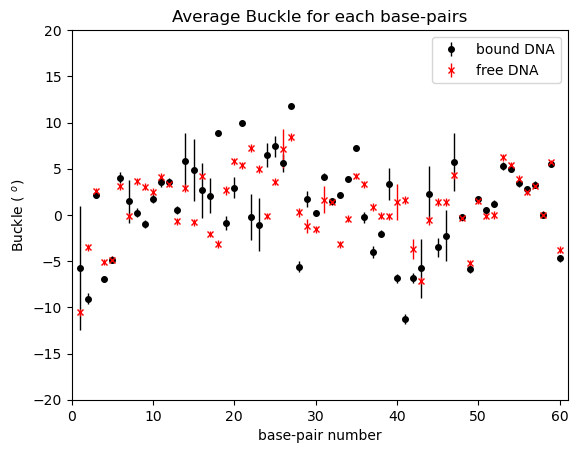

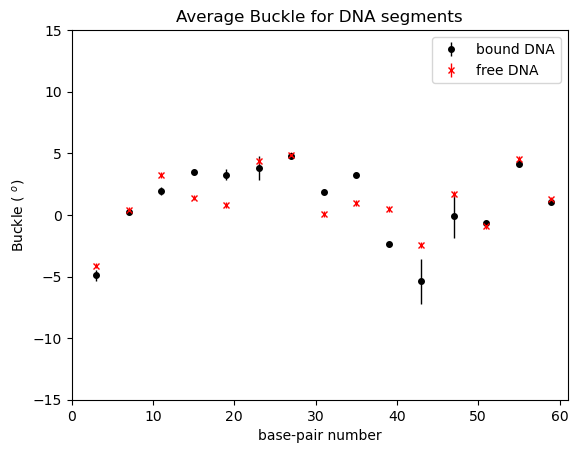

In [7]:
######## Average Buckle values as a function of base-pairs ########

plt.title('Average Buckle for each base-pairs')

### Calculating Average Buckle values for 1 to 60 base-pairs DNA bound with protein
bp, buckle, error = pdna.get_mean_error([1,60], 'buckle', err_type='block', bp_range=True)

# plot these values
plt.errorbar(bp, buckle,yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4, label='bound DNA' )

### Calculating Average Buckle values for 1 to 60 base-pairs DNA
bp, buckle, error = fdna.get_mean_error([1,60], 'buckle', err_type='block', bp_range=True)

# plot these values
plt.errorbar(bp, buckle,yerr=error, ecolor='r', elinewidth=1, color='r', lw=0, marker='x', mfc='r', mew=1, ms=4, label='free DNA' )

plt.ylabel('Buckle ( $^o$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.ylim(-20, 20)
plt.legend()
plt.show()

######## Average Buckle values as a function of DNA segments ########

plt.title('Average Buckle for DNA segments')

### Calculating Average Buckle values for 1 to 60 base-pairs DNA bound with protein
### DNA segments are assumed to made up of 5 base-pairs (merge_bp=4)
bp, buckle, error = pdna.get_mean_error([1,60], 'buckle', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(bp, buckle,yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4, label='bound DNA' )

### Calculating Average Buckle values for 1 to 60 base-pairs DNA
### DNA segments are assumed to made up of 5 base-pairs (merge_bp=4)
bp, buckle, error = fdna.get_mean_error([1,60], 'buckle', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(bp, buckle,yerr=error, ecolor='r', elinewidth=1, color='r', lw=0, marker='x', mfc='r', mew=1, ms=4, label='free DNA' )

plt.ylabel('Buckle ( $^o$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.ylim(-15, 15)
plt.legend()
plt.show()

### Deviation in parameters of bound DNA with respect to free DNA

As discussed in the above section, average parameters with standard error can be calculated for both bound and free DNA. Additionally, deviation in bound DNA with respect to the free DNA could be calculated using function [dnaMD.localDeformationVsBPS(...)](http://do-x3dna.readthedocs.io/en/latest/dnaMD_api.html#dnaMD.dnaMD.localDeformationVsBPS) as shown in the following example.



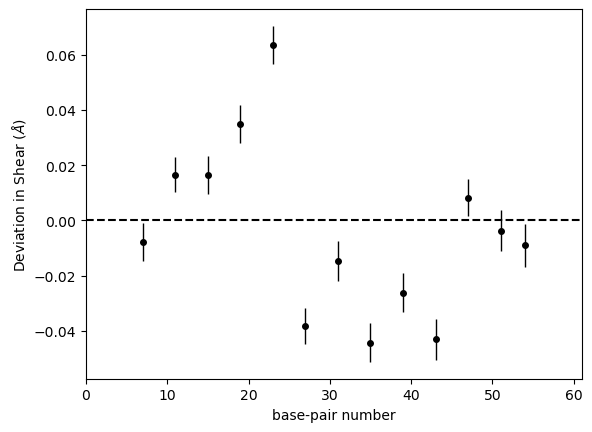

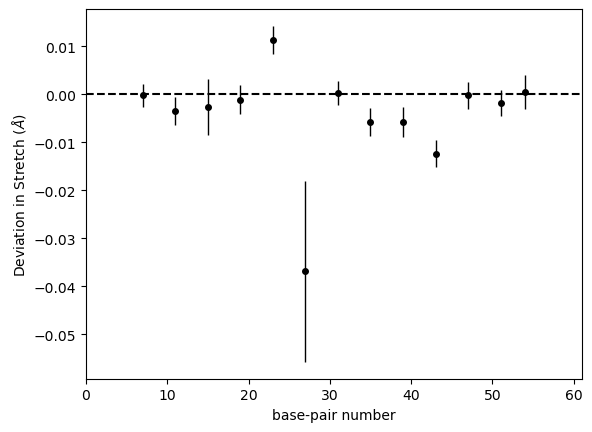

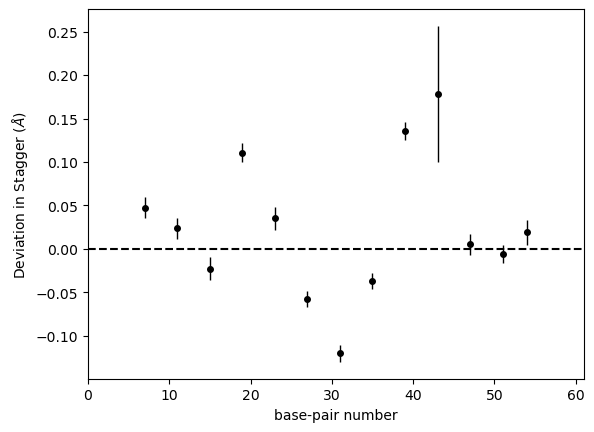

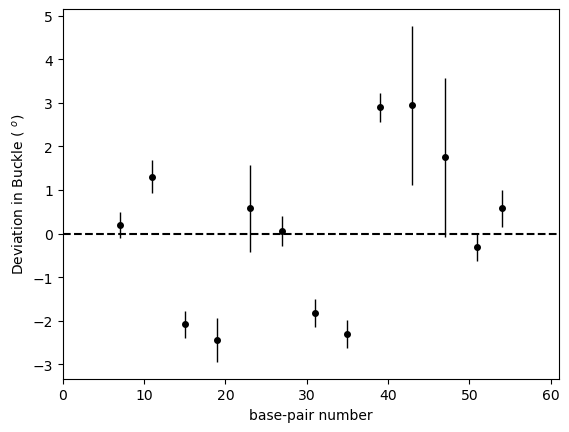

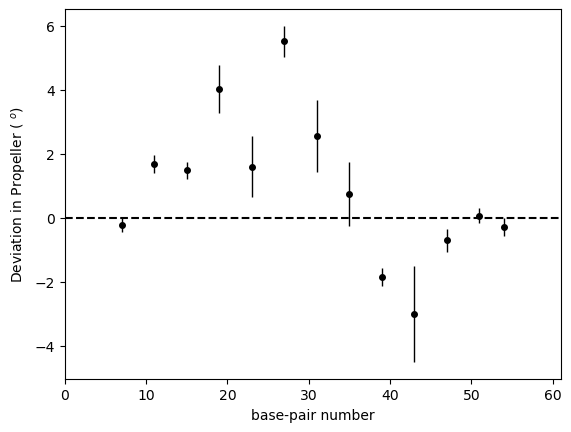

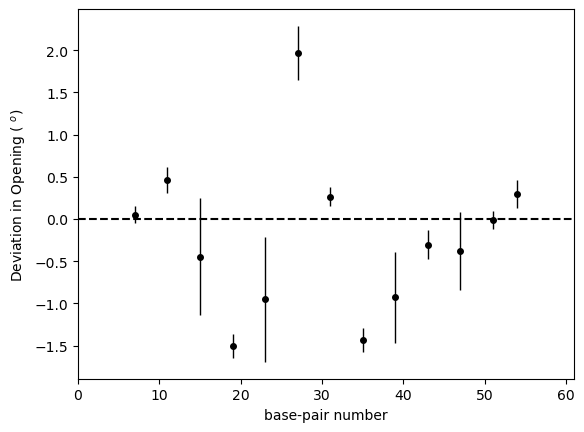

In [8]:
#### Deviation in shear, stretch, stagger, buckle, propeller and opening
#### Deviation = Bound DNA(parameter) - Free DNA(parameter)

### Deviation in Shear
fdna_bp, pdna_bp, deviation, error = dnaMD.localDeformationVsBPS(fdna, [5,55], pdna, [5,55], 
                                                              'shear', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Shear ($\AA$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
#plt.ylim(-10, 10)
plt.show()

### Deviation in Stretch
fdna_bp, pdna_bp, deviation, error = dnaMD.localDeformationVsBPS(fdna, [5,55], pdna, [5,55], 
                                                              'stretch', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Stretch ($\AA$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
#plt.ylim(-10, 10)
plt.show()

### Deviation in Stagger
fdna_bp, pdna_bp, deviation, error = dnaMD.localDeformationVsBPS(fdna, [5,55], pdna, [5,55], 
                                                              'stagger', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Stagger ($\AA$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.show()

### Deviation in Buckle
fdna_bp, pdna_bp, deviation, error = dnaMD.localDeformationVsBPS(fdna, [5,55], pdna, [5,55], 
                                                              'buckle', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Buckle ( $^o$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.show()

### Deviation in Propeller
fdna_bp, pdna_bp, deviation, error = dnaMD.localDeformationVsBPS(fdna, [5,55], pdna, [5,55], 
                                                              'propeller', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Propeller ( $^o$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.show()

### Deviation in Opening
fdna_bp, pdna_bp, deviation, error = dnaMD.localDeformationVsBPS(fdna, [5,55], pdna, [5,55], 
                                                              'opening', err_type='block', bp_range=True, merge_bp=4)

# plot these values
plt.errorbar(pdna_bp, deviation, yerr=error, ecolor='k', elinewidth=1, color='k', lw=0, marker='o', mfc='k', mew=1, ms=4)

# plot line at zero
plt.plot([0,61], [0.0, 0.0], '--k')

plt.ylabel('Deviation in Opening ( $^o$)')
plt.xlabel('base-pair number')
plt.xlim(0,61)
plt.show()